# Раздел 6. Уравнения с частными производными параболического типа.
## Лабораторная работа №6. Методы решения квазилинейного уравнения теплопроводности.
### Вариант 2 Задание 5
_Яромир Водзяновский_

Дифференциальная задача

$$\frac{\partial u}{\partial t} = \frac{\partial}{\partial x} \left( u^{1/3} \frac{\partial u}{\partial x} \right) + \frac{\partial}{\partial y} \left( u^{1/3} \frac{\partial u}{\partial y} \right), \;\;\; 0 < t\leq 1, \; 0 < x,y <1    $$
$$u(0,x,y) = (1+x+y)^6 / 27000, \; 0 \leq x,y \leq 1  $$
$$u(t,0,y) = (1+y)^6 / (30-28t)^3, \; 0 < t \leq 1, \; 0 \leq y \leq 1  $$
$$u(t,1,y) = (2+y)^6/(30-28t)^3, \; 0 < t \leq 1, \; 0 \leq y \leq 1   $$
$$u(t,x,0) = (1+x)^6 /(30-28t)^3, \; 0 < t \leq 1, \; 0 < x < 1    $$
$$u(t,x,1) = (2+x)^6 /(30-28t)^3, \; 0 < t \leq 1, \; 0 < x < 1    $$
Решение в виде: 
$$u = (C_z + x + y)^{2/\mu} \left[ C_t - \frac{4 (\mu +2)}{\mu}t \right]^{-1/\mu} $$

Для нашей задачи:
$$C_t = 30, \; C_z = 1,\; \mu = \frac{1}{3}$$

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
from mpl_toolkits.mplot3d import Axes3D

In [129]:
def anal(t,x,y):
    return (C_z + x + y)**(2/nu)*(C_t - 4*t*(nu+2)/nu)**(-1/nu)

In [164]:
def U_anal(x,y,t):   

    t_a = []
    for i in range(N):
        for j in range((L)*(K)):
            t_a.append(t[i])

    y_ar = []
    y_a = np.array([])
    for i in range(K):
        for j in range(L):
            y_ar.append(y[i])
    y_ar = np.array(y_ar)
    for n in range(N):
        y_a = np.concatenate((y_a,y_ar))

    x_a = np.array([])
    for i in range((K)*(N)):
        x_a = np.concatenate((x_a,x))

    U_an = np.vectorize(anal)(x_a,y_a,t_a).reshape(N,L,K)
    return U_an

In [165]:
def run(U_t, U_t_next):
    U_k = U_t
    u_next = np.empty(shape=(L,M))

    max_diff = eps + 1

    while max_diff > eps:
        u_next = np.empty(shape=(L,M))
        u_next[ : , 0] = U_t_next[: , 0]
        u_next[ : , -1] = U_t_next[: , -1]
        u_next[ 0 , :] = U_t_next[0 , :]
        u_next[ -1 , :] = U_t_next[-1 , :]
        for m in range(1, M-1):
            a = np.array([-dt/(2*hx**2)*((U_k[l+1][m])**nu + (U_k[l][m])**nu) for l in range(1, L-1)])
            c = np.array([-dt/(2*hx**2)*((U_k[l-1][m])**nu + (U_k[l][m])**nu) for l in range(1, L-1)])
            b = -a-c+1
            d = U_t[1:-1, m]
            
            alpha = [-a[0] / b[0]]
            beta = [(d[0] - c[0] * U_t_next[0][m]) / b[0]]
            for l in range(1, L - 2):
                alpha.append(-a[l] / (b[l] + c[l]*alpha[l-1])) #28
                beta.append((d[l] - c[l]*beta[l-1]) / (b[l] + c[l]*alpha[l-1]))
            
            for l in range(L - 2, 0, -1):
                u_next[l][m] = alpha[l - 1] * u_next[l + 1][m] + beta[l - 1]

        for l in range(1, L-1):
            a = np.array([-dt/(2*hy**2)*((U_k[l][m+1])**nu + (U_k[l][m])**nu) for m in range(1, M-1)])
            c = np.array([-dt/(2*hy**2)*((U_k[l][m-1])**nu + (U_k[l][m])**nu) for m in range(1, M-1)])
            b = -a-c+1
            d = u_next[l, 1:-1]

            alpha = [-a[0] / b[0]]
            beta = [(d[0] - c[0] * U_t_next[l][0]) / b[0]]

            for l in range(1, M - 2):
                alpha.append(-a[l] / (b[l] + c[l]*alpha[l-1]))
                beta.append((d[l] - c[l]*beta[l-1]) / (b[l] + c[l]*alpha[l-1]))

            for m in range(M - 2, 0, -1):
                u_next[l][m] = alpha[m - 1] * u_next[l][m + 1] + beta[m - 1]

        max_diff = np.max(np.abs((u_next - U_k)[1:-1] / u_next[1:-1]))
        U_k = u_next
        
    return U_k

In [199]:
C_z = 1
C_t = 30
nu = 1/3

###
delta = 0.0
eps = 0.0001
N = 10
L = 10
M = 10
###
xl, hx = np.linspace(0, 1, L, retstep=True)
ym, hy = np.linspace(0, 1, M, retstep=True)
tn, dt = np.linspace(0, 1, N, retstep=True)

# np.set_printoptions(formatter={'all':lambda x: np.format_float_scientific(x, precision = 2)})
pd.set_option('display.float_format', lambda x: '{:.3E}'.format(x))

In [200]:


U = np.zeros(shape=(N, L, M))
U[0] = (C_z + xl + ym)**(2/nu)*C_t**(-1/nu)
for n in range(0, N):
    U[n, 0, :] = (C_z + ym)**(2/nu)*(C_t - 4*(nu+2)*tn[n]/nu)**(-1/nu)
    U[n, -1, :] = (C_z + 1 + ym)**(2/nu)*(C_t - 4*(nu+2)*tn[n]/nu)**(-1/nu)
    U[n, :, 0] = (C_z + xl)**(2/nu)*(C_t - 4*(nu+2)*tn[n]/nu)**(-1/nu)
    U[n, :, -1] = (C_z + 1 + xl)**(2/nu)*(C_t - 4*(nu+2)*tn[n]/nu)**(-1/nu)

for n, t in enumerate(tn[1:], 1):
    U[n] = run(U[n-1],U[n])
u_a = anal(tn[-1], xl, ym[1])
u = U[-1, :, 1]

step_for_output = (L - 1) // 5

numeric = pd.DataFrame(columns = ym[::step_for_output], index = xl[::step_for_output])
numeric.iloc[:, :] = U[-1, ::step_for_output, ::step_for_output]

analitic = pd.DataFrame(columns = ym[::step_for_output], index = xl[::step_for_output])
a=0
for i in range(0, L, step_for_output): #L=M
    analitic.iloc[:, a] = anal(1, xl[::step_for_output], ym[i])
    a = a + 1

difference = np.abs(numeric.to_numpy() - analitic.to_numpy())
dif =  pd.DataFrame(difference, columns = ym[::step_for_output], index = xl[::step_for_output])

max_dif = np.max(np.abs(numeric.to_numpy() - analitic.to_numpy()))
    
    

## Аналитическое

In [201]:
analitic

,0.000E+00,1.111E-01,2.222E-01,3.333E-01,4.444E-01,5.556E-01,6.667E-01,7.778E-01,8.889E-01,1.000E+00
0.000E+00,1.250E-01,2.352E-01,4.167E-01,7.023E-01,1.135E+00,1.771E+00,2.679E+00,3.946E+00,5.677E+00,8.000E+00
1.111E-01,2.352E-01,4.167E-01,7.023E-01,1.135E+00,1.771E+00,2.679E+00,3.946E+00,5.677E+00,8.000E+00,1.107E+01
2.222E-01,4.167E-01,7.023E-01,1.135E+00,1.771E+00,2.679E+00,3.946E+00,5.677E+00,8.000E+00,1.107E+01,1.505E+01
3.333E-01,7.023E-01,1.135E+00,1.771E+00,2.679E+00,3.946E+00,5.677E+00,8.000E+00,1.107E+01,1.505E+01,2.017E+01
4.444E-01,1.135E+00,1.771E+00,2.679E+00,3.946E+00,5.677E+00,8.000E+00,1.107E+01,1.505E+01,2.017E+01,2.667E+01
5.556E-01,1.771E+00,2.679E+00,3.946E+00,5.677E+00,8.000E+00,1.107E+01,1.505E+01,2.017E+01,2.667E+01,3.482E+01
6.667E-01,2.679E+00,3.946E+00,5.677E+00,8.000E+00,1.107E+01,1.505E+01,2.017E+01,2.667E+01,3.482E+01,4.495E+01
7.778E-01,3.946E+00,5.677E+00,8.000E+00,1.107E+01,1.505E+01,2.017E+01,2.667E+01,3.482E+01,4.495E+01,5.742E+01
8.889E-01,5.677E+00,8.000E+00,1.107E+01,1.505E+01,2.017E+01,2.667E+01,3.482E+01,4.495E+01,5.742E+01,7.266E+01
1.000E+00,8.000E+00,1.107E+01,1.505E+01,2.017E+01,2.667E+01,3.482E+01,4.495E+01,5.742E+01,7.266E+01,9.113E+01


## Численное

In [202]:
numeric

,0.000E+00,1.111E-01,2.222E-01,3.333E-01,4.444E-01,5.556E-01,6.667E-01,7.778E-01,8.889E-01,1.000E+00
0.000E+00,1.250E-01,2.352E-01,4.167E-01,7.023E-01,1.135E+00,1.771E+00,2.679E+00,3.946E+00,5.677E+00,8.000E+00
1.111E-01,2.352E-01,1.121E+00,1.677E+00,2.438E+00,3.468E+00,4.844E+00,6.660E+00,9.027E+00,1.208E+01,1.107E+01
2.222E-01,4.167E-01,1.873E+00,2.757E+00,3.942E+00,5.512E+00,7.566E+00,1.022E+01,1.362E+01,1.792E+01,1.505E+01
3.333E-01,7.023E-01,2.678E+00,3.897E+00,5.511E+00,7.624E+00,1.036E+01,1.386E+01,1.828E+01,2.383E+01,2.017E+01
4.444E-01,1.135E+00,3.598E+00,5.177E+00,7.247E+00,9.935E+00,1.339E+01,1.776E+01,2.326E+01,3.010E+01,2.667E+01
5.556E-01,1.771E+00,4.677E+00,6.654E+00,9.225E+00,1.254E+01,1.676E+01,2.208E+01,2.872E+01,3.692E+01,3.482E+01
6.667E-01,2.679E+00,5.955E+00,8.380E+00,1.151E+01,1.550E+01,2.057E+01,2.691E+01,3.478E+01,4.446E+01,4.495E+01
7.778E-01,3.946E+00,1.285E+01,1.937E+01,2.557E+01,3.156E+01,3.737E+01,4.297E+01,4.826E+01,5.312E+01,5.742E+01
8.889E-01,5.677E+00,8.958E+00,1.230E+01,1.664E+01,2.219E+01,2.920E+01,3.797E+01,4.884E+01,6.218E+01,7.266E+01
1.000E+00,8.000E+00,1.107E+01,1.505E+01,2.017E+01,2.667E+01,3.482E+01,4.495E+01,5.742E+01,7.266E+01,9.113E+01


## Разница

In [203]:
dif 

,0.000E+00,1.111E-01,2.222E-01,3.333E-01,4.444E-01,5.556E-01,6.667E-01,7.778E-01,8.889E-01,1.000E+00
0.000E+00,0.000E+00,0.000E+00,0.000E+00,0.000E+00,0.000E+00,0.000E+00,0.000E+00,0.000E+00,0.000E+00,0.000E+00
1.111E-01,0.000E+00,7.039E-01,9.745E-01,1.303E+00,1.697E+00,2.165E+00,2.713E+00,3.349E+00,4.078E+00,0.000E+00
2.222E-01,0.000E+00,1.170E+00,1.622E+00,2.171E+00,2.833E+00,3.620E+00,4.545E+00,5.619E+00,6.851E+00,0.000E+00
3.333E-01,0.000E+00,1.543E+00,2.126E+00,2.832E+00,3.678E+00,4.682E+00,5.858E+00,7.219E+00,8.776E+00,2.487E-14
4.444E-01,0.000E+00,1.827E+00,2.498E+00,3.301E+00,4.258E+00,5.385E+00,6.698E+00,8.210E+00,9.928E+00,0.000E+00
5.556E-01,0.000E+00,1.998E+00,2.708E+00,3.547E+00,4.536E+00,5.691E+00,7.024E+00,8.544E+00,1.026E+01,0.000E+00
6.667E-01,0.000E+00,2.009E+00,2.702E+00,3.506E+00,4.439E+00,5.513E+00,6.736E+00,8.112E+00,9.638E+00,0.000E+00
7.778E-01,0.000E+00,7.177E+00,1.137E+01,1.451E+01,1.651E+01,1.720E+01,1.630E+01,1.344E+01,8.172E+00,0.000E+00
8.889E-01,0.000E+00,9.580E-01,1.236E+00,1.585E+00,2.013E+00,2.530E+00,3.150E+00,3.888E+00,4.758E+00,0.000E+00
1.000E+00,0.000E+00,0.000E+00,0.000E+00,0.000E+00,0.000E+00,0.000E+00,0.000E+00,0.000E+00,0.000E+00,0.000E+00


## Максимальная разница

In [204]:
max_dif

17.20034620259323

## 3-х мерный график при t = 1

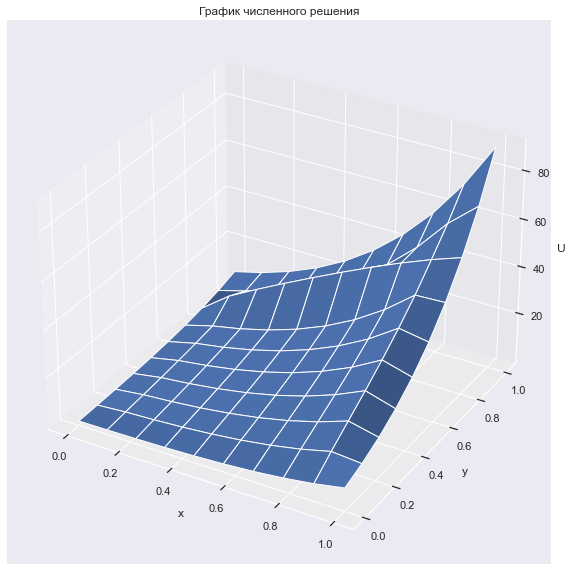

In [206]:
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111, projection='3d')
xgrid, ygrid = np.meshgrid(xl, ym)
ax.plot_surface(xgrid, ygrid, U[N-1])
ax.set_zlabel('U')
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.set_title('График численного решения')
plt.show()